In [101]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import linear_model
import seaborn as sns

## Importing Data

In [16]:
import os
# going back
os.chdir(os.getcwd()[:-20]+'/Data')

In [19]:
insurance_data = pd.read_csv('insurance_train.csv')

In [20]:
insurance_data.head()

,X.1,X.2,X.3,X.4,X.5,X.6,X.7,X.8,X.9,X.10,...,X.19,X.20,X.21,X.22,X.23,X.24,X.25,X.26,X.27,X.28
0,34429,01/06/2017,01/06/2017,01/06/2018,29/08/1996,31/05/2016,0,1,1,1,...,3,0,0,1994,75,1360,12795.55,4,P,1040
1,5552,19/09/2016,19/09/2018,19/09/2019,30/04/1992,03/08/2010,0,3,1,1,...,3,0,0,2004,100,1896,15386.00,5,D,1165
2,47700,08/01/2003,08/01/2018,08/01/2019,23/03/1972,01/02/1998,1,20,2,2,...,3,0,0,2002,95,1390,16470.00,5,P,1235
3,25425,01/10/2015,01/10/2018,01/10/2019,05/03/1946,07/08/1964,0,8,2,3,...,3,0,0,2010,140,2497,27381.00,5,D,1984
4,4727,26/01/2017,26/01/2018,26/01/2019,25/04/1973,24/07/1998,0,9,1,1,...,3,0,0,1998,80,1969,36600.00,3,P,1702


## Data Manipulation

In [24]:
# based on description
final_column_name = ['ID', 
               'Start_Date_Contract', 
               'Date_Last_Renewal', 
               'Date_Next_Renewal', 
               'Date_Of_Birth', 
               'Date_Of_DL_Issuance', 
               'Issurance_Broker_Agent_Channel', 
               'Years_Associates',
               'Total_Policies_Entity',
               'Max_Policy_Simultaneous_Force',
               'Max_Product_Simultaneous_Held',
               'Policies_Terminated_Non_Payment',
               'Half_Yearly_Payment_Method',
               'Premium_Amt_Current_Yr',
               'Total_Cost_Claims_Current_Yr',
               'Total_Number_Claims_Current_Yr',
               'Total_Number_Claims_Entire_Duration',
               'Ratio_Claims_Total_Duration_Force',
               'Motorbikes_Vans_Cars_Agricultural',
               'Rural_Urban_Flag',
               'Multiple_Drivers_Regular_Flag',
               'Yr_Vehicle_Registration',
               'Vehicle_Power_HP',
               'Cylinder_Capacity',
               'Market_Value_EOY19',
               'Vehicle_Doors',
               'Energy_Source',
               'Vehicle_Wt_Kg'
               ]

# saving old column names
old_column_names = list(insurance_data.columns)

# updating columns
insurance_data.columns = final_column_name
insurance_data.head()

,ID,Start_Date_Contract,Date_Last_Renewal,Date_Next_Renewal,Date_Of_Birth,Date_Of_DL_Issuance,Issurance_Broker_Agent_Channel,Years_Associates,Total_Policies_Entity,Max_Policy_Simultaneous_Force,...,Motorbikes_Vans_Cars_Agricultural,Rural_Urban_Flag,Multiple_Drivers_Regular_Flag,Yr_Vehicle_Registration,Vehicle_Power_HP,Cylinder_Capacity,Market_Value_EOY19,Vehicle_Doors,Energy_Source,Vehicle_Wt_Kg
0,34429,01/06/2017,01/06/2017,01/06/2018,29/08/1996,31/05/2016,0,1,1,1,...,3,0,0,1994,75,1360,12795.55,4,P,1040
1,5552,19/09/2016,19/09/2018,19/09/2019,30/04/1992,03/08/2010,0,3,1,1,...,3,0,0,2004,100,1896,15386.00,5,D,1165
2,47700,08/01/2003,08/01/2018,08/01/2019,23/03/1972,01/02/1998,1,20,2,2,...,3,0,0,2002,95,1390,16470.00,5,P,1235
3,25425,01/10/2015,01/10/2018,01/10/2019,05/03/1946,07/08/1964,0,8,2,3,...,3,0,0,2010,140,2497,27381.00,5,D,1984
4,4727,26/01/2017,26/01/2018,26/01/2019,25/04/1973,24/07/1998,0,9,1,1,...,3,0,0,1998,80,1969,36600.00,3,P,1702


In [25]:
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37451 entries, 0 to 37450
Data columns (total 28 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID                                   37451 non-null  int64  
 1   Start_Date_Contract                  37451 non-null  object 
 2   Date_Last_Renewal                    37451 non-null  object 
 3   Date_Next_Renewal                    37451 non-null  object 
 4   Date_Of_Birth                        37451 non-null  object 
 5   Date_Of_DL_Issuance                  37451 non-null  object 
 6   Issurance_Broker_Agent_Channel       37451 non-null  int64  
 7   Years_Associates                     37451 non-null  int64  
 8   Total_Policies_Entity                37451 non-null  int64  
 9   Max_Policy_Simultaneous_Force        37451 non-null  int64  
 10  Max_Product_Simultaneous_Held        37451 non-null  int64  
 11  Policies_Terminated_Non_Paym

In [29]:
date_columns = [
    'Start_Date_Contract',
    'Date_Last_Renewal', 
    'Date_Next_Renewal', 
    'Date_Of_Birth', 
    'Date_Of_DL_Issuance',
#    'Yr_Vehicle_Registration'
]

display(date_columns)

['Start_Date_Contract',
 'Date_Last_Renewal',
 'Date_Next_Renewal',
 'Date_Of_Birth',
 'Date_Of_DL_Issuance']

In [34]:
for i in date_columns:
    insurance_data[i] = pd.to_datetime(insurance_data[i], format= "%d/%m/%Y")

In [42]:
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37451 entries, 0 to 37450
Data columns (total 28 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   ID                                   37451 non-null  int64         
 1   Start_Date_Contract                  37451 non-null  datetime64[ns]
 2   Date_Last_Renewal                    37451 non-null  datetime64[ns]
 3   Date_Next_Renewal                    37451 non-null  datetime64[ns]
 4   Date_Of_Birth                        37451 non-null  datetime64[ns]
 5   Date_Of_DL_Issuance                  37451 non-null  datetime64[ns]
 6   Issurance_Broker_Agent_Channel       37451 non-null  int64         
 7   Years_Associates                     37451 non-null  int64         
 8   Total_Policies_Entity                37451 non-null  int64         
 9   Max_Policy_Simultaneous_Force        37451 non-null  int64         
 10  Max_Produc

In [43]:
# Creating LC and HALC variables
insurance_data['Loss_Cost'] = insurance_data['Total_Cost_Claims_Current_Yr']/insurance_data['Total_Number_Claims_Current_Yr']
insurance_data['Historically_Adjusted_Loss_Cost'] = insurance_data['Loss_Cost'] * insurance_data['Ratio_Claims_Total_Duration_Force']

In [68]:
insurance_data[['Loss_Cost','Historically_Adjusted_Loss_Cost']].describe()

,Loss_Cost,Historically_Adjusted_Loss_Cost
count,4151.000000,4151.000000
mean,629.839300,1156.170823
std,2448.338409,4883.628422
min,4.006923,0.000000
25%,73.970000,115.794167
50%,188.020000,316.245100
75%,608.002083,979.257050
max,118142.590000,236285.180000


In [71]:
insurance_data[['Loss_Cost','Historically_Adjusted_Loss_Cost']].isna().sum()

Loss_Cost                          33300
Historically_Adjusted_Loss_Cost    33300
dtype: int64

In [47]:
insurance_data[insurance_data['Loss_Cost']<=insurance_data['Loss_Cost'].mean()]

,ID,Start_Date_Contract,Date_Last_Renewal,Date_Next_Renewal,Date_Of_Birth,Date_Of_DL_Issuance,Issurance_Broker_Agent_Channel,Years_Associates,Total_Policies_Entity,Max_Policy_Simultaneous_Force,...,Multiple_Drivers_Regular_Flag,Yr_Vehicle_Registration,Vehicle_Power_HP,Cylinder_Capacity,Market_Value_EOY19,Vehicle_Doors,Energy_Source,Vehicle_Wt_Kg,Loss_Cost,Historically_Adjusted_Loss_Cost
18,42037,2018-05-22,2018-05-22,2019-05-22,1985-08-26,2008-11-27,0,3,2,2,...,0,2003,86,1498,11500.00,3,P,1011,25.975,98.70500
37,19557,2018-02-27,2018-02-27,2019-02-27,1960-10-20,1987-10-15,0,4,2,2,...,0,2011,144,2204,28400.00,4,D,1428,33.555,44.29260
40,46996,2018-07-18,2018-07-18,2019-07-18,1983-07-01,2002-06-17,1,4,6,6,...,0,2002,115,1461,28450.00,5,D,1532,334.140,902.17800
42,33608,2016-06-06,2017-06-06,2018-06-06,1983-01-20,2010-03-16,1,2,2,2,...,0,2001,95,1794,16167.23,5,P,1225,242.870,485.74000
100,50787,2016-03-04,2018-03-04,2019-03-04,1981-10-01,2006-05-24,0,3,1,1,...,0,2005,163,2685,46000.00,5,D,2100,66.060,96.44760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37352,42954,2014-12-10,2015-12-10,2016-12-10,1958-11-25,1978-11-13,0,3,4,4,...,1,1996,60,1149,9315.69,3,P,880,208.980,313.47000
37377,53374,2018-06-09,2018-06-09,2019-06-09,1952-02-29,1976-04-06,0,1,1,1,...,0,2016,82,1397,21163.45,5,P,1060,48.500,101.85000
37392,23158,2016-01-26,2016-01-26,2017-01-26,1964-07-06,1984-09-10,1,3,2,2,...,0,2003,110,1997,21110.00,5,D,1421,57.275,113.97725
37425,34070,2017-12-02,2017-12-02,2018-12-02,1986-02-26,2005-12-09,1,2,2,3,...,0,2001,75,1422,15050.00,5,D,1135,347.725,698.92725


In [48]:
insurance_data[insurance_data['Ratio_Claims_Total_Duration_Force'] == 0]

,ID,Start_Date_Contract,Date_Last_Renewal,Date_Next_Renewal,Date_Of_Birth,Date_Of_DL_Issuance,Issurance_Broker_Agent_Channel,Years_Associates,Total_Policies_Entity,Max_Policy_Simultaneous_Force,...,Multiple_Drivers_Regular_Flag,Yr_Vehicle_Registration,Vehicle_Power_HP,Cylinder_Capacity,Market_Value_EOY19,Vehicle_Doors,Energy_Source,Vehicle_Wt_Kg,Loss_Cost,Historically_Adjusted_Loss_Cost
0,34429,2017-06-01,2017-06-01,2018-06-01,1996-08-29,2016-05-31,0,1,1,1,...,0,1994,75,1360,12795.55,4,P,1040,NaN,NaN
1,5552,2016-09-19,2018-09-19,2019-09-19,1992-04-30,2010-08-03,0,3,1,1,...,0,2004,100,1896,15386.00,5,D,1165,NaN,NaN
3,25425,2015-10-01,2018-10-01,2019-10-01,1946-03-05,1964-08-07,0,8,2,3,...,0,2010,140,2497,27381.00,5,D,1984,NaN,NaN
6,39480,2010-05-10,2018-05-01,2019-05-01,1970-03-04,1991-07-01,0,9,1,1,...,0,1999,60,1769,11076.65,3,D,945,NaN,NaN
9,11036,2015-03-01,2017-03-01,2018-03-01,1963-03-23,1986-06-01,1,3,1,1,...,0,2000,80,1370,11507.38,5,P,1115,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37446,19562,2018-06-26,2018-06-26,2019-06-26,1960-10-02,1980-11-02,1,1,1,1,...,0,2008,84,1896,23977.20,5,D,1755,NaN,NaN
37447,5888,2001-05-23,2018-05-23,2019-05-23,1944-10-01,1963-04-01,0,18,1,1,...,0,2001,81,4525,42920.00,0,D,4525,NaN,NaN
37448,44775,2016-02-01,2018-02-01,2019-02-01,1992-04-16,2011-05-05,0,3,1,1,...,0,1996,55,998,8426.19,3,P,785,NaN,NaN
37449,35358,2016-05-24,2017-05-24,2018-05-24,1975-12-20,1996-10-14,0,2,1,1,...,0,2005,9,125,2165.00,0,P,105,NaN,NaN


In [49]:
len(insurance_data)

37451

In [50]:
insurance_data[insurance_data['Total_Number_Claims_Current_Yr'] == 0]['ID']

,ID,Start_Date_Contract,Date_Last_Renewal,Date_Next_Renewal,Date_Of_Birth,Date_Of_DL_Issuance,Issurance_Broker_Agent_Channel,Years_Associates,Total_Policies_Entity,Max_Policy_Simultaneous_Force,...,Multiple_Drivers_Regular_Flag,Yr_Vehicle_Registration,Vehicle_Power_HP,Cylinder_Capacity,Market_Value_EOY19,Vehicle_Doors,Energy_Source,Vehicle_Wt_Kg,Loss_Cost,Historically_Adjusted_Loss_Cost
0,34429,2017-06-01,2017-06-01,2018-06-01,1996-08-29,2016-05-31,0,1,1,1,...,0,1994,75,1360,12795.55,4,P,1040,NaN,NaN
1,5552,2016-09-19,2018-09-19,2019-09-19,1992-04-30,2010-08-03,0,3,1,1,...,0,2004,100,1896,15386.00,5,D,1165,NaN,NaN
2,47700,2003-01-08,2018-01-08,2019-01-08,1972-03-23,1998-02-01,1,20,2,2,...,0,2002,95,1390,16470.00,5,P,1235,NaN,NaN
3,25425,2015-10-01,2018-10-01,2019-10-01,1946-03-05,1964-08-07,0,8,2,3,...,0,2010,140,2497,27381.00,5,D,1984,NaN,NaN
4,4727,2017-01-26,2018-01-26,2019-01-26,1973-04-25,1998-07-24,0,9,1,1,...,0,1998,80,1969,36600.00,3,P,1702,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37446,19562,2018-06-26,2018-06-26,2019-06-26,1960-10-02,1980-11-02,1,1,1,1,...,0,2008,84,1896,23977.20,5,D,1755,NaN,NaN
37447,5888,2001-05-23,2018-05-23,2019-05-23,1944-10-01,1963-04-01,0,18,1,1,...,0,2001,81,4525,42920.00,0,D,4525,NaN,NaN
37448,44775,2016-02-01,2018-02-01,2019-02-01,1992-04-16,2011-05-05,0,3,1,1,...,0,1996,55,998,8426.19,3,P,785,NaN,NaN
37449,35358,2016-05-24,2017-05-24,2018-05-24,1975-12-20,1996-10-14,0,2,1,1,...,0,2005,9,125,2165.00,0,P,105,NaN,NaN


In [51]:
insurance_data[insurance_data['Total_Cost_Claims_Current_Yr'] == 0]

,ID,Start_Date_Contract,Date_Last_Renewal,Date_Next_Renewal,Date_Of_Birth,Date_Of_DL_Issuance,Issurance_Broker_Agent_Channel,Years_Associates,Total_Policies_Entity,Max_Policy_Simultaneous_Force,...,Multiple_Drivers_Regular_Flag,Yr_Vehicle_Registration,Vehicle_Power_HP,Cylinder_Capacity,Market_Value_EOY19,Vehicle_Doors,Energy_Source,Vehicle_Wt_Kg,Loss_Cost,Historically_Adjusted_Loss_Cost
0,34429,2017-06-01,2017-06-01,2018-06-01,1996-08-29,2016-05-31,0,1,1,1,...,0,1994,75,1360,12795.55,4,P,1040,NaN,NaN
1,5552,2016-09-19,2018-09-19,2019-09-19,1992-04-30,2010-08-03,0,3,1,1,...,0,2004,100,1896,15386.00,5,D,1165,NaN,NaN
2,47700,2003-01-08,2018-01-08,2019-01-08,1972-03-23,1998-02-01,1,20,2,2,...,0,2002,95,1390,16470.00,5,P,1235,NaN,NaN
3,25425,2015-10-01,2018-10-01,2019-10-01,1946-03-05,1964-08-07,0,8,2,3,...,0,2010,140,2497,27381.00,5,D,1984,NaN,NaN
4,4727,2017-01-26,2018-01-26,2019-01-26,1973-04-25,1998-07-24,0,9,1,1,...,0,1998,80,1969,36600.00,3,P,1702,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37446,19562,2018-06-26,2018-06-26,2019-06-26,1960-10-02,1980-11-02,1,1,1,1,...,0,2008,84,1896,23977.20,5,D,1755,NaN,NaN
37447,5888,2001-05-23,2018-05-23,2019-05-23,1944-10-01,1963-04-01,0,18,1,1,...,0,2001,81,4525,42920.00,0,D,4525,NaN,NaN
37448,44775,2016-02-01,2018-02-01,2019-02-01,1992-04-16,2011-05-05,0,3,1,1,...,0,1996,55,998,8426.19,3,P,785,NaN,NaN
37449,35358,2016-05-24,2017-05-24,2018-05-24,1975-12-20,1996-10-14,0,2,1,1,...,0,2005,9,125,2165.00,0,P,105,NaN,NaN


In [52]:
sum(insurance_data[insurance_data['Total_Number_Claims_Current_Yr'] == 0]['ID'] == insurance_data[insurance_data['Total_Cost_Claims_Current_Yr'] == 0]['ID'])

33300

In [57]:
ID_w_no_claim = list(insurance_data[insurance_data['Total_Number_Claims_Current_Yr'] == 0]['ID'])
ID_w_0_ratio = list(insurance_data[insurance_data['Ratio_Claims_Total_Duration_Force'] == 0]['ID'])

count = 0
check = 0
ID_w_only_ratio_0 = []
ID_w_only_LC_0 = []
for i in ID_w_0_ratio:
    if i not in ID_w_no_claim:
        count += 1
        ID_w_only_ratio_0.append(i)
    if i in ID_w_no_claim:
        check += 1
        ID_w_only_LC_0.append(i)


display(count)
display(check)

17

20000

In [55]:
ID_w_only_ratio_0

[50952,
 25278,
 38984,
 36433,
 22699,
 34865,
 34666,
 45704,
 20402,
 52724,
 2644,
 20898,
 4862,
 36383,
 42017,
 45527,
 43415]

In [59]:
sum(insurance_data['Total_Cost_Claims_Current_Yr'])/sum(insurance_data['Total_Number_Claims_Current_Yr'])

597.774893671865

In [72]:
insurance_data['Ratio_Claims_Total_Duration_Force'].describe()

count    37451.000000
mean         0.465718
std          0.810147
min          0.000000
25%          0.000000
50%          0.000000
75%          0.670000
max         23.300000
Name: Ratio_Claims_Total_Duration_Force, dtype: float64

In [77]:
pd.set_option('display.max_columns', None)
display(insurance_data[insurance_data['Ratio_Claims_Total_Duration_Force'] == insurance_data['Ratio_Claims_Total_Duration_Force'].max()])

,ID,Start_Date_Contract,Date_Last_Renewal,Date_Next_Renewal,Date_Of_Birth,Date_Of_DL_Issuance,Issurance_Broker_Agent_Channel,Years_Associates,Total_Policies_Entity,Max_Policy_Simultaneous_Force,Max_Product_Simultaneous_Held,Policies_Terminated_Non_Payment,Half_Yearly_Payment_Method,Premium_Amt_Current_Yr,Total_Cost_Claims_Current_Yr,Total_Number_Claims_Current_Yr,Total_Number_Claims_Entire_Duration,Ratio_Claims_Total_Duration_Force,Motorbikes_Vans_Cars_Agricultural,Rural_Urban_Flag,Multiple_Drivers_Regular_Flag,Yr_Vehicle_Registration,Vehicle_Power_HP,Cylinder_Capacity,Market_Value_EOY19,Vehicle_Doors,Energy_Source,Vehicle_Wt_Kg,Loss_Cost,Historically_Adjusted_Loss_Cost
23560,4154,2016-12-01,2016-12-01,2017-12-01,1964-07-07,1985-11-01,1,2,1,2,1,1,0,203.84,1642.48,5,5,23.3,3,1,1,2004,83,1399,10150.0,5,P,995,328.496,7653.9568


In [84]:
insurance_data[insurance_data['Ratio_Claims_Total_Duration_Force'] < insurance_data['Ratio_Claims_Total_Duration_Force'].max()]['Ratio_Claims_Total_Duration_Force'].nlargest(10)

32779    21.47
5377     20.86
7793     20.00
3011      4.99
3032      4.99
9635      4.99
19262     4.99
19906     4.99
20542     4.99
24244     4.99
Name: Ratio_Claims_Total_Duration_Force, dtype: float64

In [85]:
insurance_data['Ratio_Claims_Total_Duration_Force'].nlargest(30)

23560    23.30
32779    21.47
5377     20.86
7793     20.00
3011      4.99
3032      4.99
9635      4.99
19262     4.99
19906     4.99
20542     4.99
24244     4.99
36522     4.99
18029     4.97
36530     4.97
10922     4.93
21414     4.93
25451     4.93
27183     4.93
33974     4.93
37226     4.93
31738     4.90
34994     4.90
34982     4.89
11009     4.87
12939     4.87
22141     4.87
37175     4.87
36400     4.83
6374      4.80
10462     4.80
Name: Ratio_Claims_Total_Duration_Force, dtype: float64

In [86]:
insurance_data[insurance_data['Ratio_Claims_Total_Duration_Force'] > 5]

,ID,Start_Date_Contract,Date_Last_Renewal,Date_Next_Renewal,Date_Of_Birth,Date_Of_DL_Issuance,Issurance_Broker_Agent_Channel,Years_Associates,Total_Policies_Entity,Max_Policy_Simultaneous_Force,Max_Product_Simultaneous_Held,Policies_Terminated_Non_Payment,Half_Yearly_Payment_Method,Premium_Amt_Current_Yr,Total_Cost_Claims_Current_Yr,Total_Number_Claims_Current_Yr,Total_Number_Claims_Entire_Duration,Ratio_Claims_Total_Duration_Force,Motorbikes_Vans_Cars_Agricultural,Rural_Urban_Flag,Multiple_Drivers_Regular_Flag,Yr_Vehicle_Registration,Vehicle_Power_HP,Cylinder_Capacity,Market_Value_EOY19,Vehicle_Doors,Energy_Source,Vehicle_Wt_Kg,Loss_Cost,Historically_Adjusted_Loss_Cost
5377,32237,2018-10-26,2018-10-26,2019-10-26,1978-01-27,2016-09-02,1,2,3,3,1,0,1,299.86,312.87,2,7,20.86,3,1,0,2002,65,1870,15145.51,5,D,1250,156.435,3263.2341
7793,182,2018-09-18,2018-09-18,2019-09-18,1970-04-14,1988-12-28,1,1,2,2,1,0,0,270.06,665.14,5,5,20.00,3,0,0,2007,136,1997,26150.00,5,D,1581,133.028,2660.5600
23560,4154,2016-12-01,2016-12-01,2017-12-01,1964-07-07,1985-11-01,1,2,1,2,1,1,0,203.84,1642.48,5,5,23.30,3,1,1,2004,83,1399,10150.00,5,P,995,328.496,7653.9568
32779,33726,2018-11-13,2018-11-13,2019-11-13,1991-04-04,2014-02-20,0,1,1,1,1,0,1,416.57,219.44,1,1,21.47,3,0,0,2004,115,1910,19410.00,3,D,1265,219.440,4711.3768


In [91]:
years_df = pd.DataFrame()

years_df['YR'] = insurance_data['Start_Date_Contract'].dt.year
years_df['Total_Claims'] = insurance_data['Total_Number_Claims_Current_Yr']

Matplotlib is building the font cache; this may take a moment.


<Axes: xlabel='YR'>

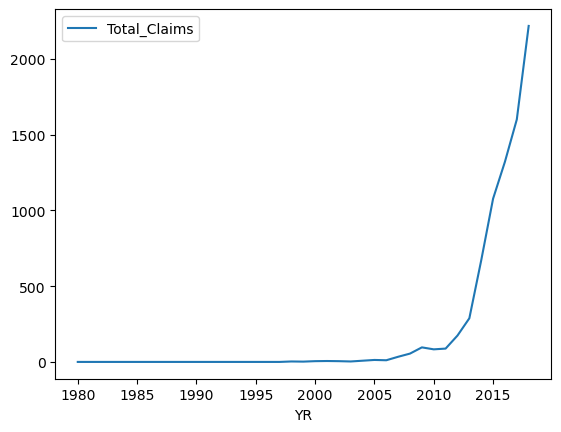

In [93]:
years_df.groupby(
    by = 'YR',
).sum().plot()

<Axes: xlabel='YR'>

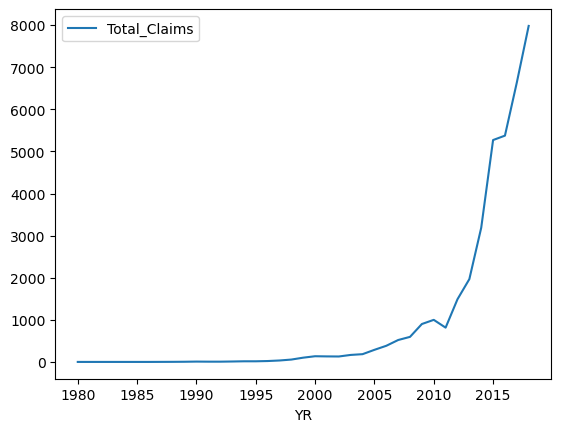

In [94]:
years_df.groupby(
    by = 'YR',
).count().plot()

In [100]:
-(insurance_data['Date_Of_Birth'] - insurance_data['Start_Date_Contract']).max()

Timedelta('6584 days 00:00:00')

<Axes: xlabel='Market_Value_EOY19', ylabel='Premium_Amt_Current_Yr'>

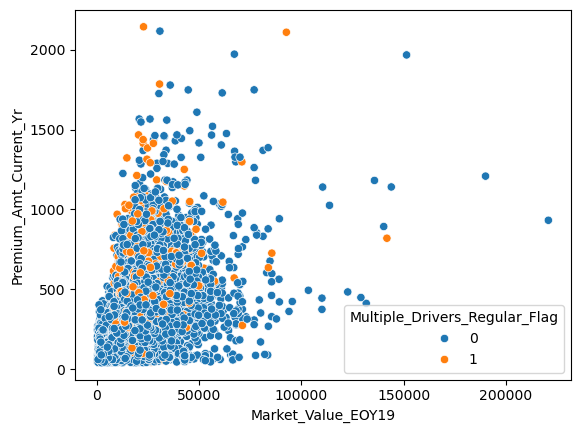

In [104]:
sns.scatterplot(
    data = insurance_data,
    x = 'Market_Value_EOY19',
    y = 'Premium_Amt_Current_Yr',
    hue = 'Multiple_Drivers_Regular_Flag'
)

In [105]:
years_df['DOB'] = insurance_data['Date_Of_Birth'] 

In [120]:
years_df['age'] = pd.to_datetime('today').year - years_df['DOB'].dt.year - 7

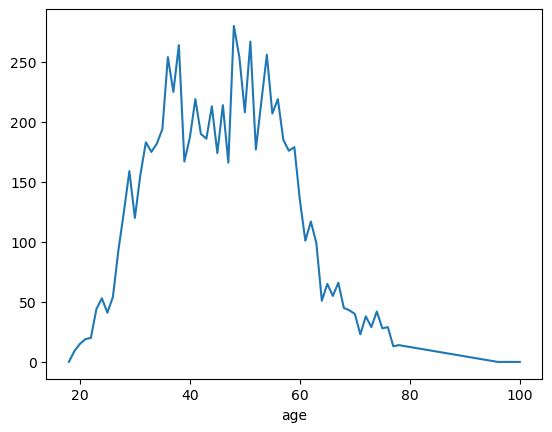

In [121]:
age_claims = years_df.groupby(
    by = 'age'
)['Total_Claims'].sum().plot()

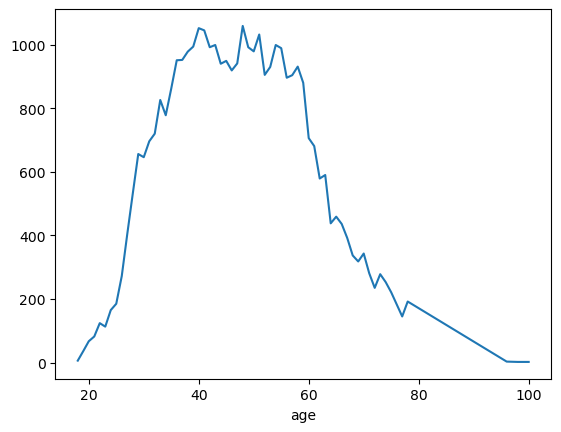

In [122]:
age_claims = years_df.groupby(
    by = 'age'
)['Total_Claims'].count().plot()

In [123]:
Car_Metrics = pd.DataFrame()

# creating that DataFrame
Car_Metrics = insurance_data[['ID', 
               'Premium_Amt_Current_Yr',
               'Total_Cost_Claims_Current_Yr',
               'Total_Number_Claims_Current_Yr',
               'Total_Number_Claims_Entire_Duration',
               'Ratio_Claims_Total_Duration_Force',
               'Motorbikes_Vans_Cars_Agricultural',
               'Multiple_Drivers_Regular_Flag',
               'Yr_Vehicle_Registration',
               'Vehicle_Power_HP',
               'Cylinder_Capacity',
               'Market_Value_EOY19',
               'Vehicle_Doors',
               'Energy_Source',
               'Vehicle_Wt_Kg'
               ]]

<Axes: xlabel='Vehicle_Power_HP'>

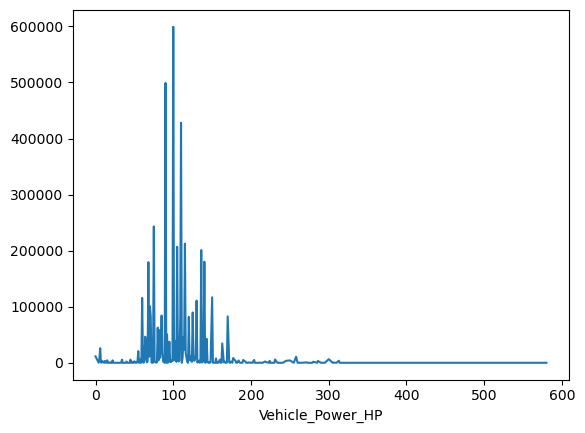

In [133]:
Car_Metrics.groupby(
    by = 'Vehicle_Power_HP'
)['Total_Cost_Claims_Current_Yr'].sum().plot()

<Axes: xlabel='Vehicle_Power_HP'>

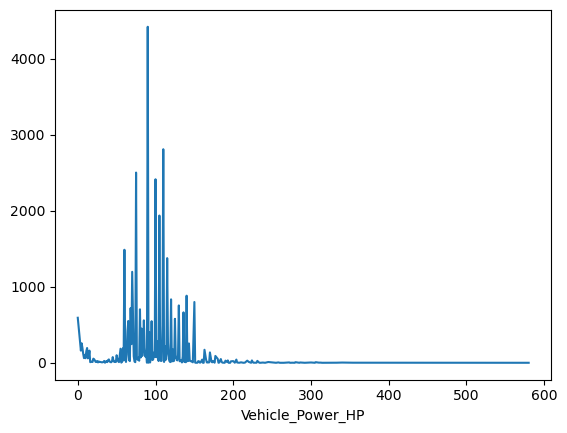

In [125]:
Car_Metrics.groupby(
    by = 'Vehicle_Power_HP'
)['Total_Number_Claims_Current_Yr'].count().plot()

<Axes: xlabel='Vehicle_Power_HP'>

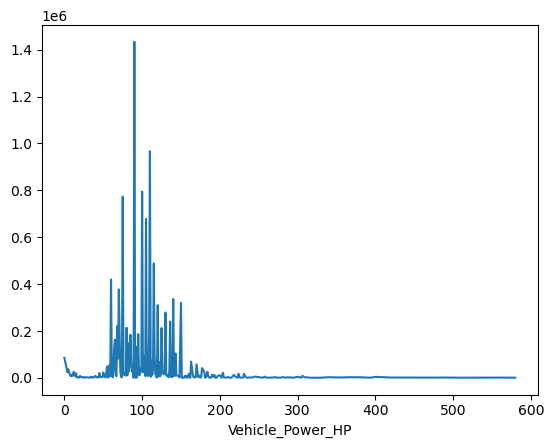

In [126]:
Car_Metrics.groupby(
    by = 'Vehicle_Power_HP'
)['Premium_Amt_Current_Yr'].sum().plot()

<Axes: xlabel='Vehicle_Power_HP'>

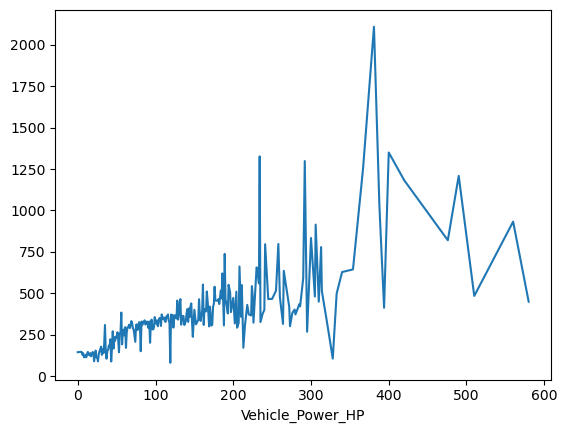

In [127]:
Car_Metrics.groupby(
    by = 'Vehicle_Power_HP'
)['Premium_Amt_Current_Yr'].mean().plot()

<Axes: xlabel='Motorbikes_Vans_Cars_Agricultural'>

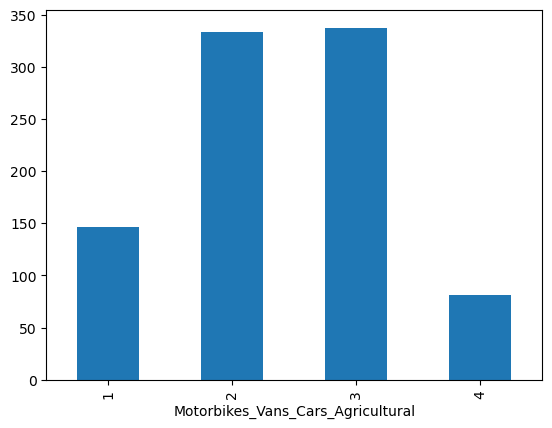

In [129]:
Car_Metrics.groupby(
    by = 'Motorbikes_Vans_Cars_Agricultural'
)['Premium_Amt_Current_Yr'].mean().plot(kind = 'bar')

<Axes: xlabel='Motorbikes_Vans_Cars_Agricultural'>

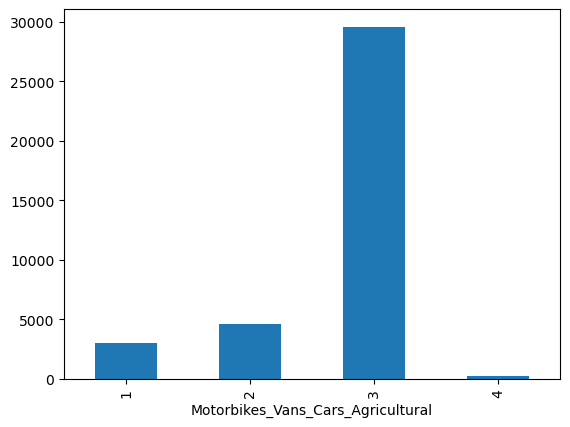

In [130]:
Car_Metrics.groupby(
    by = 'Motorbikes_Vans_Cars_Agricultural'
)['Premium_Amt_Current_Yr'].count().plot(kind = 'bar')

<Axes: xlabel='Motorbikes_Vans_Cars_Agricultural'>

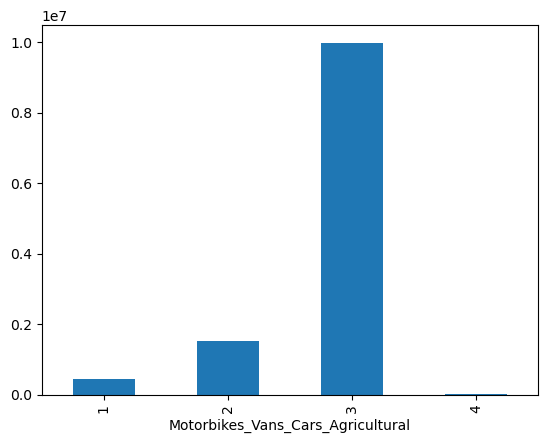

In [131]:
Car_Metrics.groupby(
    by = 'Motorbikes_Vans_Cars_Agricultural'
)['Premium_Amt_Current_Yr'].sum().plot(kind = 'bar')

<Axes: xlabel='Motorbikes_Vans_Cars_Agricultural'>

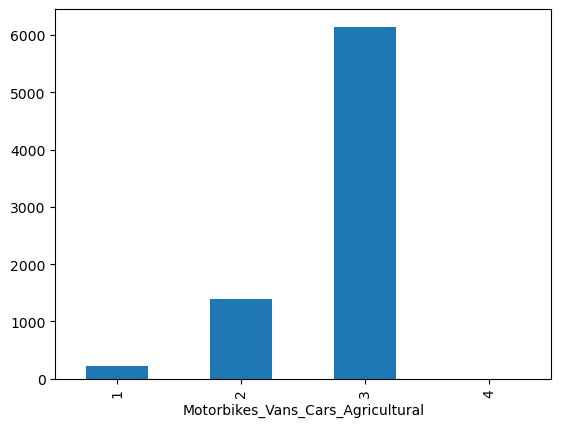

In [132]:
Car_Metrics.groupby(
    by = 'Motorbikes_Vans_Cars_Agricultural'
)['Total_Number_Claims_Current_Yr'].sum().plot(kind = 'bar')